In [121]:
#Data_preprocssing and visulazing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrices
from sklearn.metrics import accuracy_score

# Data Exploration

In [122]:
test=pd.read_csv(r"D:\internships\Mentorness_projects\MIP-ML-11\Disease Prediction\test_data.csv")

In [123]:
train=pd.read_csv(r"D:\internships\Mentorness_projects\MIP-ML-11\Disease Prediction\Train_data.csv")

In [124]:
train

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [125]:
train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [127]:
train.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

<Axes: >

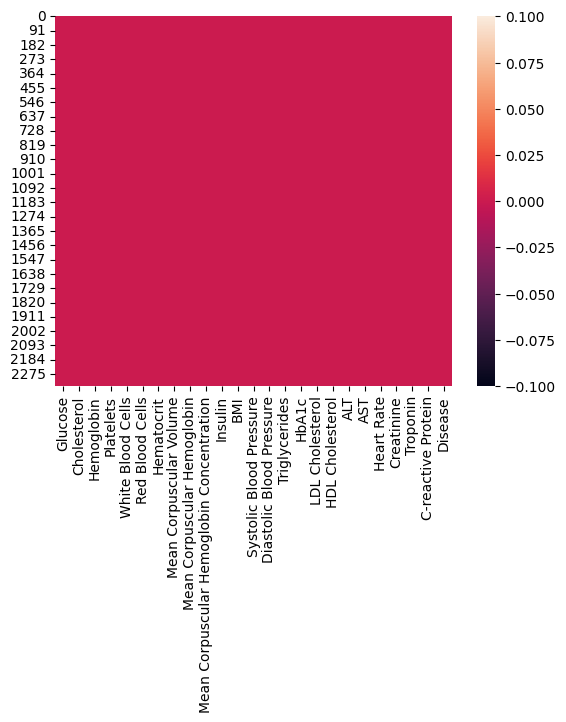

In [128]:
sns.heatmap(train.isnull())

# Data Cleaning

- Label Encoder for the Target

In [129]:
train['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [130]:
train['Disease'] = train['Disease'].apply(lambda x: 0 if x == 'Healthy' else 1)
test['Disease'] = test['Disease'].apply(lambda x: 0 if x == 'Healthy' else 1)

In [131]:
train['Disease'].unique()

array([0, 1], dtype=int64)

# Data Anayltics

In [132]:
numric_data=train.select_dtypes(exclude='object')
cor=numric_data.corr()

<Axes: >

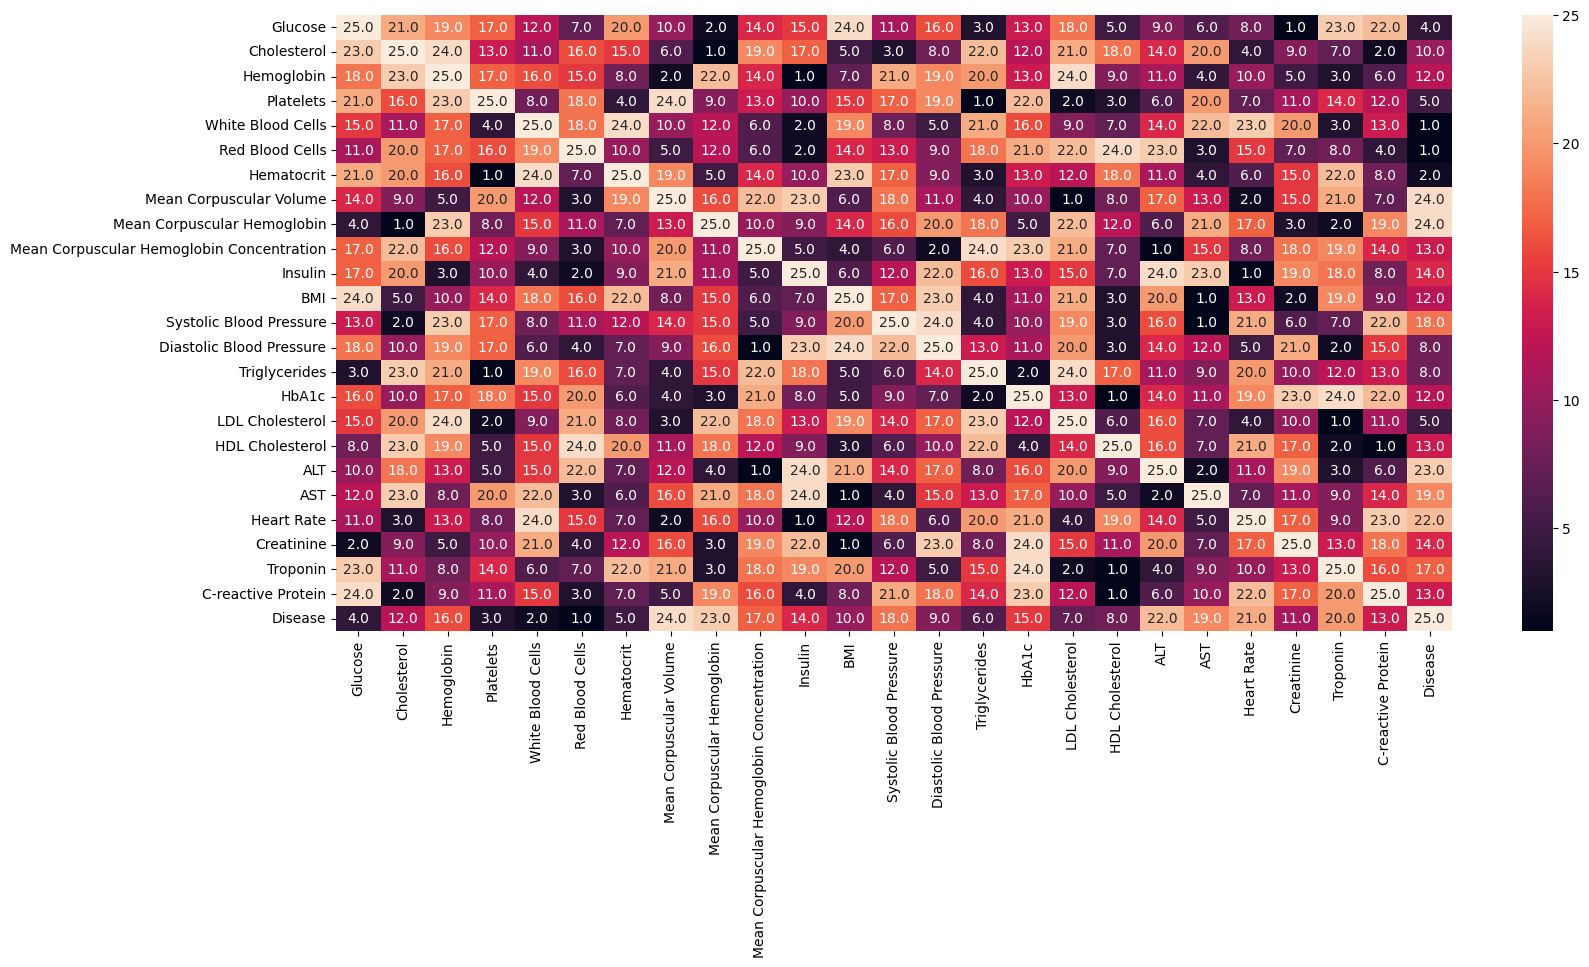

In [133]:
plt.figure(figsize=(18, 8))
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f')

<Axes: ylabel='count'>

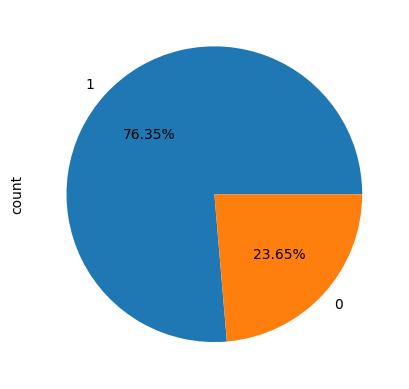

In [134]:
train['Disease'].value_counts().plot.pie(autopct='%0.2f%%')

##### We gonna drop some useless columns
- 'Glucose'
- 'Platelets'
- 'Red Blood Cells',
- 'Mean Corpuscular Volume'
- 'Diastolic Blood Pressure'
- 'Triglycerides',
- 'ALT'
- 'White Blood Cells'
- 'Heart Rate'
##### Because it's have low Correlation with The target

In [135]:
train.drop(['Glucose','Platelets','Red Blood Cells','Mean Corpuscular Volume','Diastolic Blood Pressure','Triglycerides',
           'ALT','White Blood Cells','Heart Rate'],axis=1,inplace=True)

In [136]:
test.drop(['Glucose','Platelets','Red Blood Cells','Mean Corpuscular Volume','Diastolic Blood Pressure','Triglycerides',
           'ALT','White Blood Cells','Heart Rate'],axis=1,inplace=True)

# Create Model

In [137]:
y_train=train['Disease']
train.drop(['Disease'],axis=1,inplace=True)

In [138]:
y_test=test['Disease']
test.drop(['Disease'],axis=1,inplace=True)

In [139]:
Models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'SVM':SVC()
}

In [140]:
def get_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy= accuracy_score(pred,y_test)
    return (accuracy)

In [141]:
for i in Models.keys():
    accuracy =get_score(Models[i],train,y_train,test,y_test)
    print('Accuracy of ',i,'is :',accuracy)

Accuracy of  LogisticRegression is : 0.9300411522633745
Accuracy of  RandomForestClassifier is : 0.9506172839506173
Accuracy of  DecisionTreeClassifier is : 0.7942386831275721
Accuracy of  GradientBoostingClassifier is : 0.9259259259259259
Accuracy of  KNeighborsClassifier is : 0.6275720164609053
Accuracy of  GaussianNB is : 0.9814814814814815
Accuracy of  SVM is : 0.9382716049382716


# Results

#### The better model is GaussianNB then RandomForestClassifier